In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rossmann-store-sales/sample_submission.csv
/kaggle/input/rossmann-store-sales/store.csv
/kaggle/input/rossmann-store-sales/train.csv
/kaggle/input/rossmann-store-sales/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import pandas as pd
df = pd.read_csv("../input/rossmann-store-sales/train.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
print("Shape of the Dataset:",df.shape)

Shape of the Dataset: (1017209, 9)


In [5]:
df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
store = pd.read_csv("../input/rossmann-store-sales/store.csv")
print("Shape of the Dataset:",store.shape)

Shape of the Dataset: (1115, 10)


In [7]:
store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
df_new = df.merge(store,on=["Store"], how="inner")
print(df_new.shape)


(1017209, 18)


In [9]:
print("Distinct number of Stores :", len(df_new["Store"].unique()))
print("Distinct number of Days :", len(df_new["Date"].unique()))
print("Average daily sales of all stores : ",round(df_new["Sales"].mean(),2))

Distinct number of Stores : 1115
Distinct number of Days : 942
Average daily sales of all stores :  5773.82


In [10]:
df_new.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [11]:
df_new["DayOfWeek"].value_counts()

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

**Extract All the date Features**

In [12]:
df_new['Date'] = pd.to_datetime(df_new['Date'], infer_datetime_format=True)
df_new["Month"] = df_new["Date"].dt.month
df_new["Quarter"] = df_new["Date"].dt.quarter
df_new["Year"] = df_new["Date"].dt.year
df_new["Day"] = df_new["Date"].dt.day
df_new["Week"] = df_new["Date"].dt.week


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [13]:
df_new["Season"] = np.where(df_new["Month"].isin([3,4,5]),"Spring",np.where(df_new["Month"].isin([6,7,8]),"Summer",np.where(df_new["Month"].isin([9,10,11]),"Fall",np.where(df_new["Month"].isin([12,1,2]),"Winter","None"))))


**Using the head command to view (only) the data and the newly engineered features**

In [14]:
print(df_new[["Date","Year","Month","Day","Week","Quarter","Season"]].head())

        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


**visualizing**

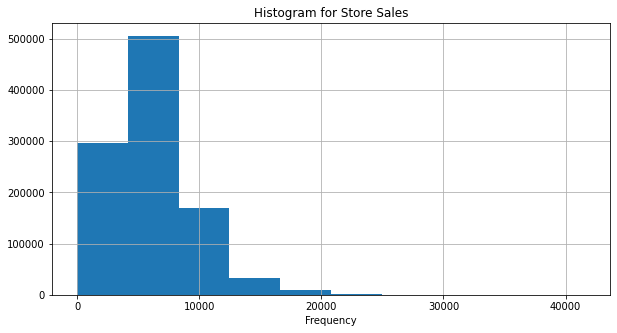

In [15]:
#Create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(10,5))
plt.grid()
plt.hist(df_new["Sales"])
plt.title("Histogram for Store Sales")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()

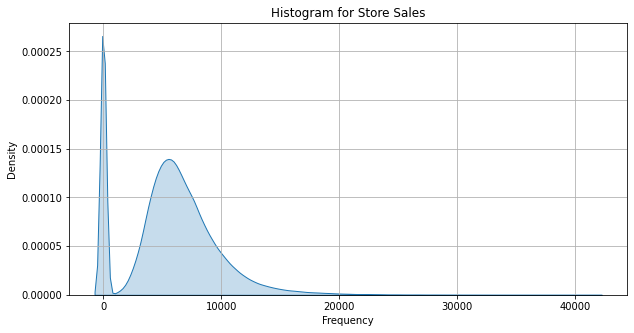

In [16]:
plt.figure(figsize=(10,5))
plt.grid()
sns.kdeplot(df_new["Sales"], fill=True)
plt.title("Histogram for Store Sales")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()

**Exploring Numeric Columns**

* Use the histogram function provided by the Pandas object

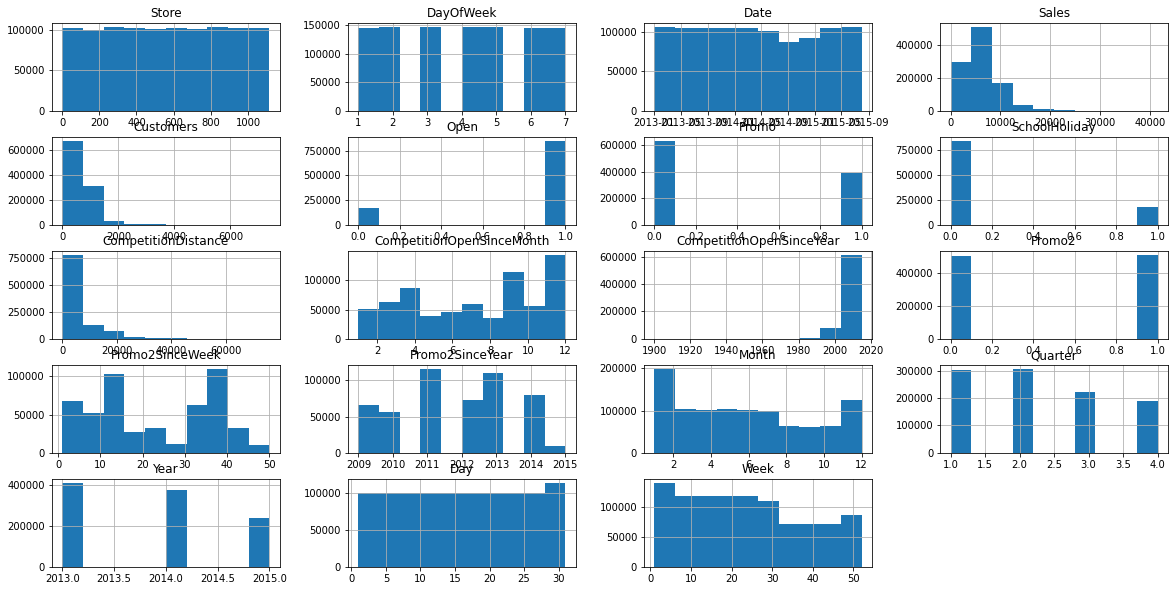

In [17]:
df_new.hist(figsize=(20,10))
plt.show()

**Missing values**

In [18]:
for i in df_new.columns:
    print("Missing values in ",i, "is -",  "    "  ,df_new[i].isnull().sum()/df_new.shape[0] * 100)

Missing values in  Store is -      0.0
Missing values in  DayOfWeek is -      0.0
Missing values in  Date is -      0.0
Missing values in  Sales is -      0.0
Missing values in  Customers is -      0.0
Missing values in  Open is -      0.0
Missing values in  Promo is -      0.0
Missing values in  StateHoliday is -      0.0
Missing values in  SchoolHoliday is -      0.0
Missing values in  StoreType is -      0.0
Missing values in  Assortment is -      0.0
Missing values in  CompetitionDistance is -      0.25973030124586
Missing values in  CompetitionOpenSinceMonth is -      31.787764363075826
Missing values in  CompetitionOpenSinceYear is -      31.787764363075826
Missing values in  Promo2 is -      0.0
Missing values in  Promo2SinceWeek is -      49.94362023930186
Missing values in  Promo2SinceYear is -      49.94362023930186
Missing values in  PromoInterval is -      49.94362023930186
Missing values in  Month is -      0.0
Missing values in  Quarter is -      0.0
Missing values in  Ye

**Imputation with Mode values**

In [19]:
df_new["CompetitionDistance"]=df_new["CompetitionDistance"].fillna(df_new["CompetitionDistance"].mode()[0])

**Double check if we still see nulls for the column**

In [20]:
df_new["CompetitionDistance"].isnull().sum()/df_new.shape[0] * 100

0.0

**Understanding the Categorical Features**

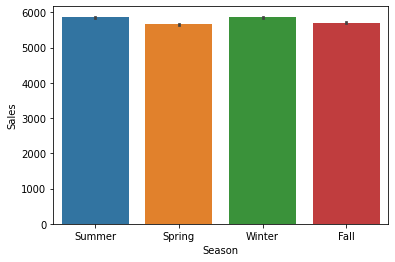

In [21]:
#Create the bar plot for Average Sales across different Seasons
ax = sns.barplot(x="Season", y="Sales", data=df_new)

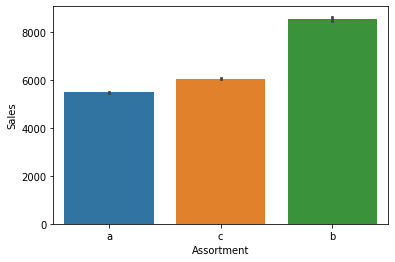

In [22]:
#Create the bar plot for Average Sales across different Assortments
ax = sns.barplot(x="Assortment", y="Sales", data=df_new)

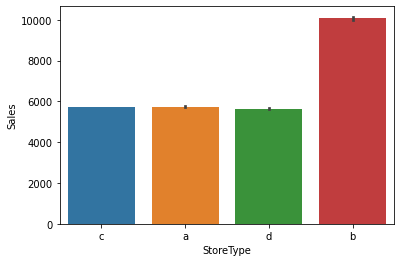

In [23]:
#Create the bar plot for Average Sales across different Store Types
ax = sns.barplot(x="StoreType", y="Sales", data=df_new)


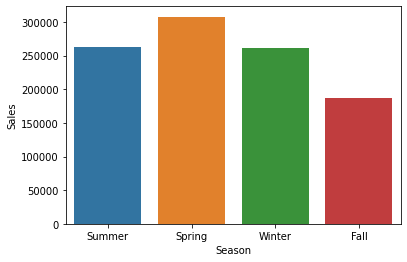

In [24]:
ax = sns.barplot(x="Season", y="Sales", data=df_new,estimator=np.size)


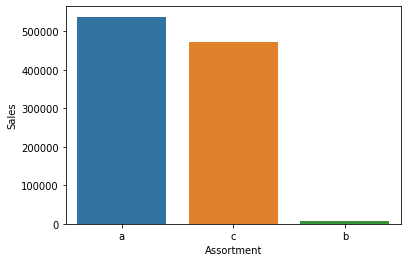

In [25]:
ax = sns.barplot(x="Assortment", y="Sales", data=df_new,estimator=np.size)

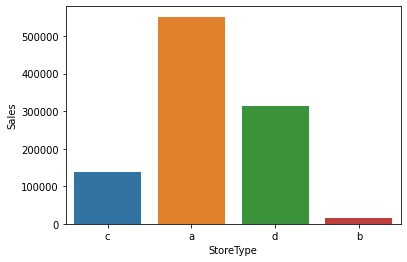

In [26]:
ax = sns.barplot(x="StoreType", y="Sales", data=df_new,estimator=np.size)

**Data Engineering**

* #Define a variable for each type of feature

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [28]:
target = ["Sales"]

In [29]:
numeric_columns = ["Customers","Open","Promo","Promo2","StateHoliday","SchoolHoliday",
                   "CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year",
                       "StoreType","Assortment","Season"]


In [30]:
#Define a function that will intake the raw dataframe
def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(df_new[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

In [31]:
#Since the above function converts the column, one at a time
#We create a loop to create the final dataset with all features
temp = df_new[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(df_new,column)
    temp = pd.concat([temp,temp_df],axis=1)

In [32]:
print("Shape of Data:",temp.shape)
print("Distinct Datatypes:",temp.dtypes.unique())

Shape of Data: (1017209, 44)
Distinct Datatypes: [dtype('int64') dtype('O') dtype('float64')]


In [33]:
print(temp.columns[temp.dtypes=="object"])

Index(['StateHoliday'], dtype='object')


In [34]:
temp["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [35]:
temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1)
#One last check of the data type
temp.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

**Train-Test-Split**

In [36]:
from sklearn.model_selection import train_test_split


In [37]:
x_train, x_test, y_train, y_test = train_test_split(temp,df_new[target],test_size=0.2,random_state=2018)

In [38]:
#Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.1,random_state=2018)

In [39]:
#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (732390, 44)
Shape of x_val: (81377, 44)
Shape of x_test: (203442, 44)
Shape of y_train: (732390, 1)
Shape of y_val: (81377, 1)
Shape of y_test: (203442, 1)


**Defining Model Baseline Performance**

In [40]:
#calculate the average score of the train dataset
mean_sales = y_train.mean()
print("Average Sales :",mean_sales)

Average Sales : Sales    5773.099997
dtype: float64


In [41]:
#Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(y_test - mean_sales).mean()[0])

MAE for Test Data: 2883.587604303127


**Designing the DNN**
*  Start with small architectures.
*  When small architectures (with two layers) fail, increase the size.
* When larger networks with two layers fail, go deeper.
*  When larger and deeper networks also fail, go even larger and even deeper.
* When everything fails, revisit the data

**Create Deep Neural Network Architecture**

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [43]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
#The input_dim =44, since the width of the training data=44 (refer data engg section)
model.add(Dense(1,activation = "linear"))


2022-09-29 09:26:05.395435: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [44]:
#Configure the model
model.compile(optimizer='adam',loss="mean_absolute_error", metrics=["mean_absolute_error"])

In [45]:
#Train the model
model.fit(x_train.values,y_train.values, validation_data=(x_val,y_val),epochs=10,batch_size=64)

2022-09-29 09:26:06.098194: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
11444/11444 [==============================] - 21s 2ms/step - loss: 949.4141 - mean_absolute_error: 949.4141 - val_loss: 821.8738 - val_mean_absolute_error: 821.8738
Epoch 2/10
11444/11444 [==============================] - 21s 2ms/step - loss: 781.4952 - mean_absolute_error: 781.4952 - val_loss: 751.3886 - val_mean_absolute_error: 751.3886
Epoch 3/10
11444/11444 [==============================] - 20s 2ms/step - loss: 741.0007 - mean_absolute_error: 741.0007 - val_loss: 735.3550 - val_mean_absolute_error: 735.3550
Epoch 4/10
11444/11444 [==============================] - 20s 2ms/step - loss: 725.2391 - mean_absolute_error: 725.2391 - val_loss: 712.0281 - val_mean_absolute_error: 712.0281
Epoch 5/10
11444/11444 [==============================] - 22s 2ms/step - loss: 713.5037 - mean_absolute_error: 713.5037 - val_loss: 745.5887 - val_mean_absolute_error: 745.5887
Epoch 6/10
11444/11444 [==============================] - 21s 2ms/step - loss: 706.9674 - mean_absolute_error: 706.

**Testing the Model Performance**

In [46]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(x_test.values,y_test.values)

#Print the results
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

6358/6358 [==============================] - 10s 2ms/step - loss: 688.2950 - mean_absolute_error: 688.2950
Metric  loss : 688.29
Metric  mean_absolute_error : 688.29


**Improving the Model**
* In the following network, we have added two more layers with similar numbers of neurons
* We will update our loss function to mean squared error instead of MAE

In [47]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
history = model.fit(x_train,y_train, validation_data=(x_val,
y_val),epochs=10,batch_size=64)
#result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/10
11444/11444 [==============================] - 43s 4ms/step - loss: 1718797.7500 - mean_absolute_error: 849.7004 - val_loss: 1116462.7500 - val_mean_absolute_error: 722.0202
Epoch 2/10
11444/11444 [==============================] - 39s 3ms/step - loss: 1158631.5000 - mean_absolute_error: 722.2584 - val_loss: 1069183.0000 - val_mean_absolute_error: 698.7987
Epoch 3/10
11444/11444 [==============================] - 40s 3ms/step - loss: 1086117.5000 - mean_absolute_error: 698.7021 - val_loss: 1027069.3750 - val_mean_absolute_error: 681.3471
Epoch 4/10
11444/11444 [==============================] - 39s 3ms/step - loss: 1052315.6250 - mean_absolute_error: 688.0210 - val_loss: 980079.7500 - val_mean_absolute_error: 670.1331
Epoch 5/10
11444/11444 [==============================] - 39s 3ms/step - loss: 1026101.9375 - mean_absolute_error: 680.4962 - val_loss: 1010591.2500 - val_mean_absolute_error: 691.0016
Epoch 6/10
11444/11444 [==============================] - 38s 3ms/step - los

In [48]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val),
epochs=15,batch_size=64)
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/15
11444/11444 [==============================] - 55s 5ms/step - loss: 1690155.5000 - mean_absolute_error: 848.0298 - val_loss: 1105953.5000 - val_mean_absolute_error: 705.4253
Epoch 2/15
11444/11444 [==============================] - 52s 5ms/step - loss: 1156470.6250 - mean_absolute_error: 720.6958 - val_loss: 1019149.0625 - val_mean_absolute_error: 682.0356
Epoch 3/15
11444/11444 [==============================] - 49s 4ms/step - loss: 1097137.2500 - mean_absolute_error: 701.4722 - val_loss: 1435905.7500 - val_mean_absolute_error: 832.8124
Epoch 4/15
11444/11444 [==============================] - 49s 4ms/step - loss: 1064729.3750 - mean_absolute_error: 691.0792 - val_loss: 1125021.8750 - val_mean_absolute_error: 705.0380
Epoch 5/15
11444/11444 [==============================] - 51s 4ms/step - loss: 1035048.3125 - mean_absolute_error: 681.4214 - val_loss: 940086.0625 - val_mean_absolute_error: 657.8316
Epoch 6/15
11444/11444 [==============================] - 52s 5ms/step - los

**Increasing the Number of Neurons**
* two hidden layers having 350 neurons each and uses a model configuration

In [49]:
model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val),
epochs=15,batch_size=64)
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/15
11444/11444 [==============================] - 38s 3ms/step - loss: 1676833.2500 - mean_absolute_error: 842.5742 - val_loss: 1182624.5000 - val_mean_absolute_error: 719.3463
Epoch 2/15
11444/11444 [==============================] - 38s 3ms/step - loss: 1157330.7500 - mean_absolute_error: 723.8979 - val_loss: 1047482.1250 - val_mean_absolute_error: 690.6622
Epoch 3/15
11444/11444 [==============================] - 37s 3ms/step - loss: 1088442.0000 - mean_absolute_error: 703.0292 - val_loss: 1003557.1250 - val_mean_absolute_error: 674.1793
Epoch 4/15
11444/11444 [==============================] - 39s 3ms/step - loss: 1058953.5000 - mean_absolute_error: 693.8430 - val_loss: 1043395.3750 - val_mean_absolute_error: 677.1143
Epoch 5/15
11444/11444 [==============================] - 38s 3ms/step - loss: 1031736.1250 - mean_absolute_error: 685.0639 - val_loss: 965124.6250 - val_mean_absolute_error: 664.4574
Epoch 6/15
11444/11444 [==============================] - 38s 3ms/step - los

**Conclusion**
* We can see quite a bit of improvement when we use an architecture that was built with a higher number of neurons.
* We can use the history, post training, to visualize and understand the model’s learning curve

In [50]:
from keras.callbacks import History
history = History()
model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val),
epochs=15,batch_size=64,callbacks=[history])
result = model.evaluate(x_test,y_test)

for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/15
11444/11444 [==============================] - 91s 8ms/step - loss: 1635868.1250 - mean_absolute_error: 840.0845 - val_loss: 1154325.8750 - val_mean_absolute_error: 715.0417
Epoch 2/15
11444/11444 [==============================] - 93s 8ms/step - loss: 1178157.2500 - mean_absolute_error: 727.2094 - val_loss: 1126368.3750 - val_mean_absolute_error: 698.0116
Epoch 3/15
11444/11444 [==============================] - 93s 8ms/step - loss: 1109651.8750 - mean_absolute_error: 704.4002 - val_loss: 1196239.5000 - val_mean_absolute_error: 739.7811
Epoch 4/15
11444/11444 [==============================] - 90s 8ms/step - loss: 1068297.5000 - mean_absolute_error: 691.1456 - val_loss: 1133598.1250 - val_mean_absolute_error: 733.6102
Epoch 5/15
11444/11444 [==============================] - 86s 8ms/step - loss: 1038727.5000 - mean_absolute_error: 682.5831 - val_loss: 999166.1875 - val_mean_absolute_error: 666.7141
Epoch 6/15
11444/11444 [==============================] - 88s 8ms/step - los

**Plotting the Loss Metric Across Epochs**

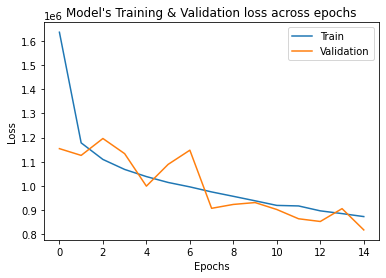

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**Testing the Model Manually**

In [52]:
#Manually predicting from the model, instead of using model's evaluate function
y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Sales","Predicted Sales"]
print(y_test.head(10))


        Actual Sales  Predicted Sales
115563             0         0.106386
832654             0         0.106386
769112          2933      3209.298584
350588          8602      7259.171387
141556          6975      6348.395020
84435           9239      8863.255859
53018              0         0.106386
262419             0         0.106386
702267          5885      5216.647949
981431             0         0.106386


In [53]:
#Manually predicting from the model, instead of using model's evaluate function
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :",mean_squared_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))
print("MAE :",mean_absolute_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))

MSE : 822605.2408836328
MAE : 606.9956644710697


**Conclusion**
*  We started with the problem statement and defined it using industry standard frameworks to get an intuitive understanding of why we are solving this problem.
* We then explored the data to understand the available features and different data types